In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


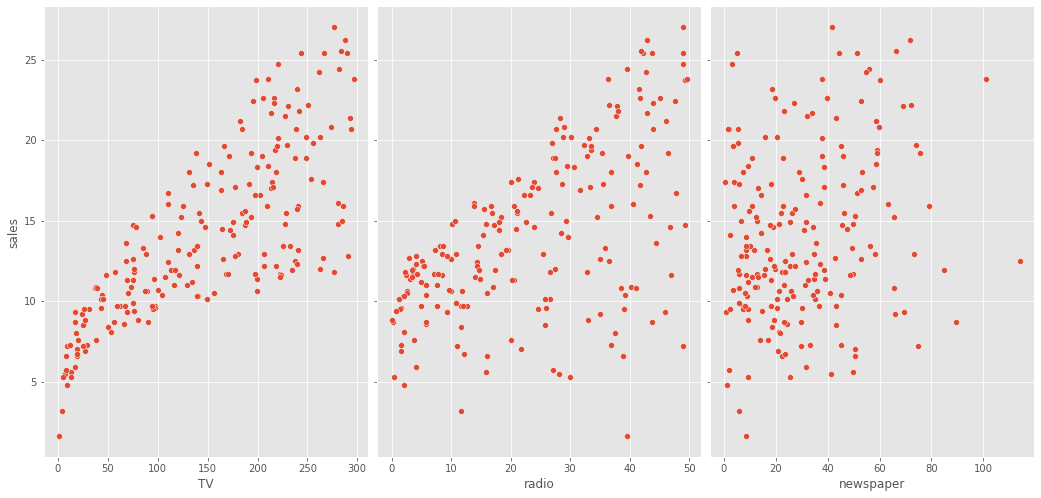

In [7]:
sns.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales',
            height = 7, aspect = 0.7)

In [9]:
from sklearn.linear_model import LinearRegression

X = df[['TV', 'radio', 'newspaper']]
y = df.sales

lm1 = LinearRegression()
lm1.fit(X,y)

print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
pd.DataFrame(data=lm1.coef_.reshape(1,3), columns=['TV', 'radio', 'newspaper'])

,TV,radio,newspaper
0,0.045765,0.18853,-0.001037


<AxesSubplot:>

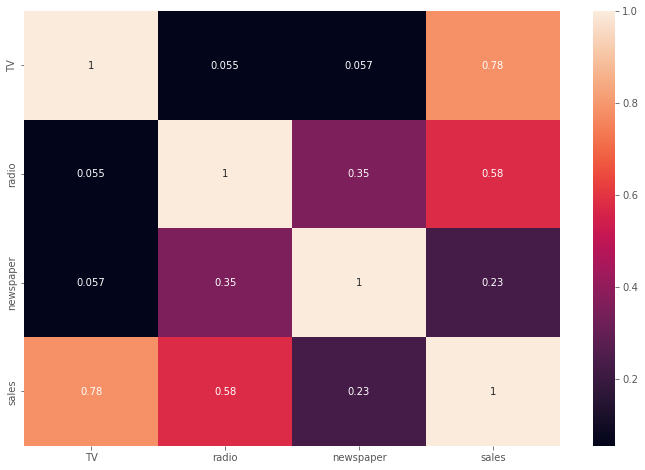

In [19]:
sns.heatmap(df.corr(), annot=True)

In [20]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828956


In [22]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789522


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['TV', 'radio', 'newspaper']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE:  1.4113417558581585
R^2:  0.8927605914615384


In [26]:
X = df[['TV', 'radio']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE:  1.3982924890777746
R^2:  0.8947344950027067


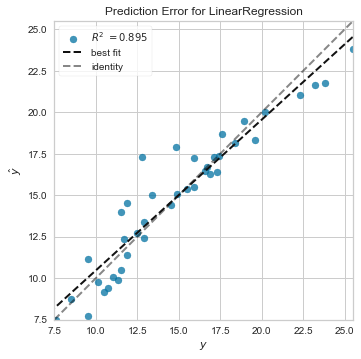

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [31]:
df['interaction'] = df['TV'] * df['radio']

X = df[['TV', 'radio', 'interaction']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

lm6 = LinearRegression().fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE:  0.5870420254600692
R^2:  0.9814463903900937


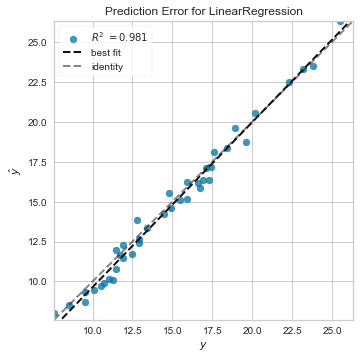

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [32]:
visualizer = PredictionError(lm6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()